## ***Name : `Fawad Ali Shaikh`***
## ***Course : `Data Science`***

## ***`ML` `(Iris dataset)`***

### ***`Import` `Libraries`***

In [98]:
# To handle data
import pandas as pd
import numpy as np

# To visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning tasks
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Pre-process
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score, precision_score, recall_score

# Save the model
import os
import pickle

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")




## ***`Let's` `do` `EDA`***

In [99]:
# Load dataset
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [100]:
df.shape

(150, 5)

In [101]:
# Columns' name in the dataset

df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [102]:
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

Number of rows: 150
Number of columns: 5


In [103]:
# Information about dataset

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [104]:
# Summary

df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [105]:
# Check Null Values

df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [106]:
print(f'So we have no null value in the dataset')

So we have no null value in the dataset


## ***`Pre-processing`***

In [107]:
# Encode categorical & object variables

le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])


In [108]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## ***`Machine Learning`***

In [109]:
X = df.drop('species', axis=1)
y = df['species']


In [110]:
# split into train & test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [111]:
# Call the model

model = LogisticRegression()

In [112]:
# Train the model

model.fit(X_train, y_train)

LogisticRegression()

In [113]:
# Predict

pred = model.predict(X_test)

In [114]:
# Evalute

print(f'Accuracy: {accuracy_score(y_test, pred)}')
print(f'Precision: {precision_score(y_test, pred, average="macro")}')
print(f'Recall: {recall_score(y_test, pred, average="macro")}')
print(f'F1 Score: {f1_score(y_test, pred, average="macro")}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, pred)}')
print(f'Classification Report: \n{classification_report(y_test, pred)}')

Accuracy: 0.9
Precision: 0.8925925925925925
Recall: 0.8977272727272728
F1 Score: 0.8935574229691876
Confusion Matrix: 
[[11  0  0]
 [ 0  7  1]
 [ 0  2  9]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.78      0.88      0.82         8
           2       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.89      0.90      0.89        30
weighted avg       0.90      0.90      0.90        30



Text(95.72222222222221, 0.5, 'Actual')

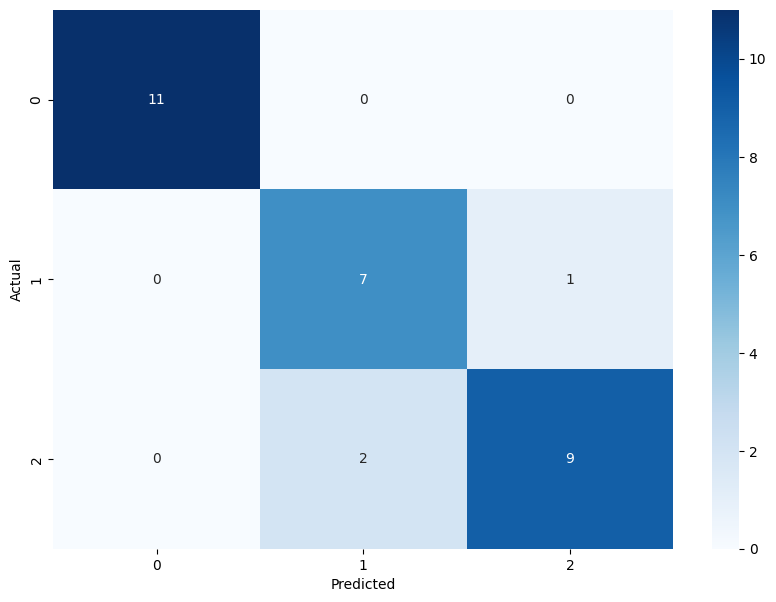

In [115]:
# plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap='Blues',fmt='d' )
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [116]:
# Actual number of species in the test data
actual_species = y_test.sum()

# Predicted number of species by the model
predicted_species = model.predict(X_test).sum()

print(f"Actual number of species: {actual_species}")
print(f"Predicted number of species: {predicted_species}")

Actual number of species: 30
Predicted number of species: 29


***This shows our model work better on this dataset.***

In [117]:
# Create the directory if it doesn't exist
os.makedirs('./saved_models', exist_ok=True)

# Now save the model
pickle.dump(model, open('./saved_models/iris_model_logistic_regression.pkl', 'wb'))